# DataKirk Assessment - Cancer Waiting Times Dataset Analysis

*Dataset:*

Cancer Waiting Times statistics for the 62 day standard for patients urgently referred with a suspicion of cancer to first cancer treatment and for the 31 day standard for patients regardless of the route of referral from date decision to treat to first cancer treatment. Includes data presented by NHS Board and Cancer Type.

*Assessment Task:*

- Please answer the following questions using the data in the links below. Submit your answers by: 5:00 PM on Thursday 7th March, 2024. 
- Feel free to employ any analytical tool to assist in your analysis. For computed responses, kindly present your answers rounded to the nearest decimal place.
- Please access the PHS Cancer Waiting Times Open data (62 Day Standard) at https://www.opendata.nhs.scot/dataset/cancer-waiting-times
- This Task requires you to identify certain council areas and boards from the dataset, so please conduct your own research and use appropriate lookup file(s) to facilitate your analysis. 

*Additional Datasets:*
- Council Area 2011 - Council Area 2019  - https://www.opendata.nhs.scot/dataset/geography-codes-and-labels/resource/967937c4-8d67-4f39-974f-fd58c4acfda5
- Health Board 2014 - Health Board 2019 - https://www.opendata.nhs.scot/dataset/geography-codes-and-labels/resource/652ff726-e676-4a20-abda-435b98dd7bdc


# Dataset Exploration:

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('cancer_wait_times.csv')


In [2]:
# Display the first few rows of the dataset
df.head()

,_id,Quarter,HB,HBQF,HBT,CancerType,CancerTypeQF,NumberOfEligibleReferrals62DayStandard,NumberOfEligibleReferrals62DayStandardQF,NumberOfEligibleReferralsTreatedWithin62Days,NumberOfEligibleReferralsTreatedWithin62DaysQF
0,1,2012Q1,S08000015,NaN,S08000015,All Cancer Types,d,169,NaN,164,NaN
1,2,2012Q1,S08000015,NaN,S08000017,All Cancer Types,d,2,NaN,2,NaN
2,3,2012Q1,S08000015,NaN,S08000020,All Cancer Types,d,1,NaN,1,NaN
3,4,2012Q1,S08000015,NaN,S08000031,All Cancer Types,d,26,NaN,21,NaN
4,5,2012Q1,S08000015,NaN,SB0801,All Cancer Types,d,2,NaN,2,NaN


In [3]:
# Summary statistics
df.describe()

,_id,NumberOfEligibleReferrals62DayStandard,NumberOfEligibleReferralsTreatedWithin62Days
count,17765.000000,17765.000000,17765.000000
mean,8883.000000,36.914382,31.510048
std,5128.458102,94.068411,78.244680
min,1.000000,1.000000,0.000000
25%,4442.000000,2.000000,2.000000
50%,8883.000000,8.000000,7.000000
75%,13324.000000,32.000000,28.000000
max,17765.000000,1330.000000,897.000000


In [4]:
df_hb = pd.read_csv('health_board.csv')

In [5]:
df_hb.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
1,S08000016,NHS Borders,20140401,NaN,S92000003
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
3,S08000018,NHS Fife,20140401,20180201.0,S92000003
4,S08000019,NHS Forth Valley,20140401,NaN,S92000003


In [6]:
df_ca = pd.read_csv('council_area.csv')

In [7]:
df_ca.head()

,CA,CAName,CADateEnacted,CADateArchived,HSCP,HSCPName,HSCPDateEnacted,HSCPDateArchived,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S12000005,Clackmannanshire,19960401,NaN,S37000005,Clackmannanshire and Stirling,20160401,NaN,S08000019,NHS Forth Valley,20140401,NaN,S92000003
1,S12000006,Dumfries and Galloway,19960401,NaN,S37000006,Dumfries and Galloway,20160401,NaN,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
2,S12000008,East Ayrshire,19960401,NaN,S37000008,East Ayrshire,20150402,NaN,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
3,S12000010,East Lothian,19960401,NaN,S37000010,East Lothian,20160401,NaN,S08000024,NHS Lothian,20140401,NaN,S92000003
4,S12000011,East Renfrewshire,19960401,NaN,S37000011,East Renfrewshire,20151007,NaN,S08000021,NHS Greater Glasgow and Clyde,20140401,20190331.0,S92000003


# Questions:

### Which health board had the percentage of Head & Neck cancer cases consistently above the national average from 2018 to 2022?

In [8]:
# Finding the National Average

# Define a list of quarters from 2018Q1 to 2022Q4
quarters = ['2018Q1', '2018Q2', '2018Q3', '2018Q4',
                         '2019Q1', '2019Q2', '2019Q3', '2019Q4',
                         '2020Q1', '2020Q2', '2020Q3', '2020Q4',
                         '2021Q1', '2021Q2', '2021Q3', '2021Q4',
                         '2022Q1', '2022Q2', '2022Q3', '2022Q4']

# Number of cases from 2018 to 2022
quarters_2018_to_2022 = df[df['Quarter'].isin(quarters)]

cases_2018_to_2022 = quarters_2018_to_2022['NumberOfEligibleReferrals62DayStandard'].sum()

# Number of head and neck cases from 2018 to 2022
head_neck_2018_to_2022 = quarters_2018_to_2022[quarters_2018_to_2022['CancerType'] == 'Head & Neck']

head_neck_cases = head_neck_2018_to_2022['NumberOfEligibleReferrals62DayStandard'].sum()

#National average
national_avg = head_neck_cases/cases_2018_to_2022 * 100

print("National Average:")
print(national_avg)


# Group the data by health board and sum the total number of cases for each board
total_by_board = quarters_2018_to_2022.groupby('HB')['NumberOfEligibleReferrals62DayStandard'].sum()

# Group the data by health board and sum the number of head and neck cases for each board
head_neck_by_board = head_neck_2018_to_2022.groupby('HB')['NumberOfEligibleReferrals62DayStandard'].sum()

# Calculate the average number of head and neck cases for each health board
avg_head_neck_by_board = (head_neck_by_board / total_by_board) * 100

# Find health boards with head and neck cases higher than the national average
higher_than_national_avg = avg_head_neck_by_board[avg_head_neck_by_board > national_avg]

print("Health Boards with Head and Neck Cases Higher than the National Average:")
print(higher_than_national_avg)


National Average:
2.0294737959118705
Health Boards with Head and Neck Cases Higher than the National Average:
HB
S08000024    2.355798
S08000026    2.542373
S08000031    2.544873
S08000032    2.158010
Name: NumberOfEligibleReferrals62DayStandard, dtype: float64


In [9]:
# Names of the Health Boards
df_hb_answer = df_hb[(df_hb['HB'] == 'S08000024') | (df_hb['HB'] == 'S08000026') | (df_hb['HB'] == 'S08000031') | (df_hb['HB'] == 'S08000032')]
df_hb_answer.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
9,S08000024,NHS Lothian,20140401,NaN,S92000003
11,S08000026,NHS Shetland,20140401,NaN,S92000003
16,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
17,S08000032,NHS Lanarkshire,20190401,NaN,S92000003


### Which council area within NHS Tayside had the highest number of Lymphoma cases in the year 2020?

In [10]:
# Find NHS Tayside on the HB Dataset
df_hb_NHS_Tayside = df_hb[df_hb['HBName'] == 'NHS Tayside']

df_hb_NHS_Tayside.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
12,S08000027,NHS Tayside,20140401,20180201.0,S92000003
15,S08000030,NHS Tayside,20180202,NaN,S92000003


In [11]:
# Filter the dataset for Lymphoma cases in the year 2020
lymphoma_2020 = df[(df['CancerType'] == 'Lymphoma') & (df['Quarter'].str.startswith('2020'))]

# Filter the dataset for NHS Tayside
nhs_tayside_lymphoma_2020 = lymphoma_2020[lymphoma_2020['HB'] == 'S08000030']

nhs_tayside_lymphoma_2020.head()

,_id,Quarter,HB,HBQF,HBT,CancerType,CancerTypeQF,NumberOfEligibleReferrals62DayStandard,NumberOfEligibleReferrals62DayStandardQF,NumberOfEligibleReferralsTreatedWithin62Days,NumberOfEligibleReferralsTreatedWithin62DaysQF


### Considering the dataset on Cancer Waiting Times, create a chart to visually represent the annual trend in the number of Breast cancer cases at NHS Greater Glasgow and Clyde from 2012 to 2023

In [12]:
# Find NHS Greater Glasgow and NHS Clyde

df_hb_ggc = df_hb[df_hb['HBName'] == 'NHS Greater Glasgow and Clyde']

df_hb_ggc.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
6,S08000021,NHS Greater Glasgow and Clyde,20140401,20190331.0,S92000003
16,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003


In [13]:
# import chart library
import matplotlib.pyplot as plt

/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_57549/1697300664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  breast_cancer_ggc['Year'] = breast_cancer_ggc['Quarter'].str[:4]


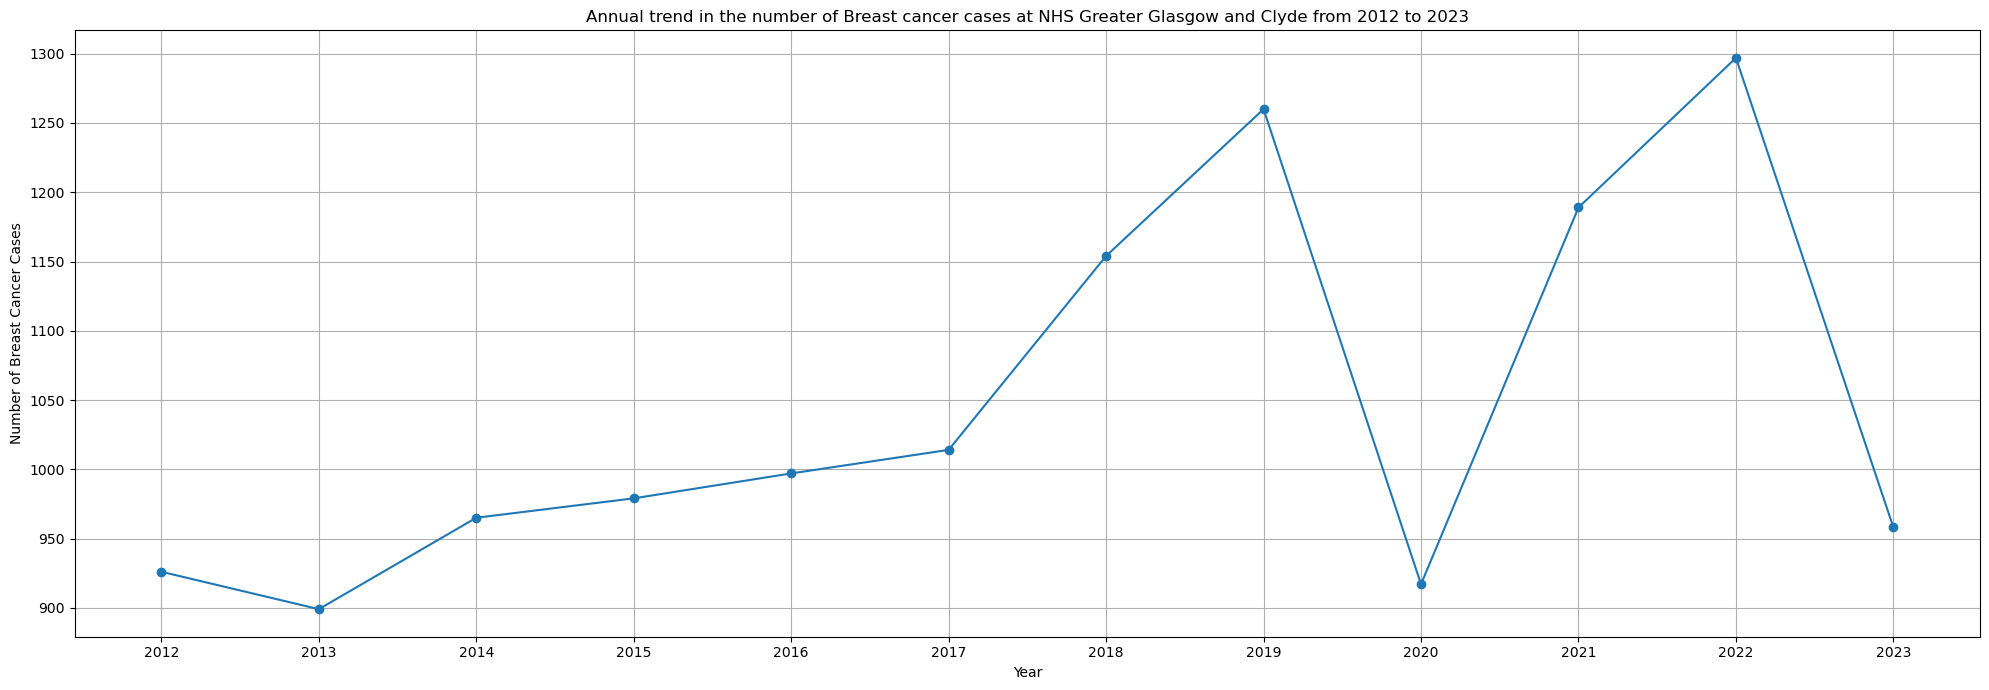

In [14]:
# Filter the dataset for Breast cancer cases at NHS Greater Glasgow and Clyde
breast_cancer_ggc = df[(df['CancerType'] == 'Breast') & (df['HB'] == 'S08000031')]

# Extract the year from the 'Quarter' column and create a new 'Year' column
breast_cancer_ggc['Year'] = breast_cancer_ggc['Quarter'].str[:4]

# Group the data by year and sum the number of Breast cancer cases for each year
breast_cancer_ggc_annual = breast_cancer_ggc.groupby('Year')['NumberOfEligibleReferrals62DayStandard'].sum()

# Convert the year to numeric type for proper sorting
breast_cancer_ggc_annual.index = pd.to_numeric(breast_cancer_ggc_annual.index)

# Sort the data by year
breast_cancer_ggc_annual = breast_cancer_ggc_annual.sort_index()

# Plot the data as a line chart
plt.figure(figsize=(20, 7))
plt.plot(breast_cancer_ggc_annual.index, breast_cancer_ggc_annual.values, marker='o')
plt.title('Annual trend in the number of Breast cancer cases at NHS Greater Glasgow and Clyde from 2012 to 2023')
plt.xlabel('Year')
plt.ylabel('Number of Breast Cancer Cases')
plt.grid(True)
plt.xticks(range(2012, 2024))
plt.tight_layout()
plt.savefig('breast_cancer_trend.png')
plt.show()

### Identify the council area where the percentage change in Lung cancer cases has been most significant between the years 2019 to 2023 in Scotland.

In [15]:
# Filter the dataset for Lung cancer cases for the years 2019 and 2023 in Scotland
lung_cancer_2019_2023 = df[(df['CancerType'] == 'Lung') & (df['Quarter'].str.startswith('2019') | df['Quarter'].str.startswith('2023'))]

# Extract the year from the 'Quarter' column and create a new 'Year' column
lung_cancer_2019_2023['Year'] = lung_cancer_2019_2023['Quarter'].str[:4]

# Group the data by Health Board and sum the number of Lung cancer cases for each Health Board and year
lung_cancer_by_hb = lung_cancer_2019_2023.groupby(['HB', 'Year'])['NumberOfEligibleReferrals62DayStandard'].sum().unstack()

# Calculate the percentage change in Lung cancer cases for each Health Board
percentage_change = ((lung_cancer_by_hb['2023'] - lung_cancer_by_hb['2019']) / lung_cancer_by_hb['2019']) * 100

# Identify the Health Board with the highest percentage change
most_significant_hb = percentage_change.idxmax()

print("Health Board with the most significant percentage change in Lung cancer cases (2019-2023):")
print(most_significant_hb)

Health Board with the most significant percentage change in Lung cancer cases (2019-2023):
S08000026


/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_57549/1053765829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lung_cancer_2019_2023['Year'] = lung_cancer_2019_2023['Quarter'].str[:4]


In [16]:
# Finding which council area S08000026 points to

df_ca_S08000026 = df_ca[df_ca['HB'] == 'S08000026']
df_ca_S08000026.head()

,CA,CAName,CADateEnacted,CADateArchived,HSCP,HSCPName,HSCPDateEnacted,HSCPDateArchived,HB,HBName,HBDateEnacted,HBDateArchived,Country
18,S12000027,Shetland Islands,19960401,NaN,S37000026,Shetland Islands,20160401,NaN,S08000026,NHS Shetland,20140401,NaN,S92000003


### What is the total number of eligible referrals for cancer treatment in Scotland in the third quarter of 2023? What percentage of these referrals were for Lung & Upper GI cancer?

In [17]:
# Filter the dataset for the third quarter of 2023 in Scotland
q3_2023_scotland = df[(df['Quarter'] == '2023Q3')]

# Calculate the total number of eligible referrals for cancer treatment in the third quarter of 2023
total_q3_2023 = q3_2023_scotland['NumberOfEligibleReferrals62DayStandard'].sum()

# Filter the dataset for Lung & Upper GI cancer cases in the third quarter of 2023 in Scotland
lung_upper_gi_q3_2023 = q3_2023_scotland[(q3_2023_scotland['CancerType'] == 'Lung') | (q3_2023_scotland['CancerType'] == 'Upper GI')]

# Calculate the number of referrals for Lung & Upper GI cancer in the third quarter of 2023
lung_upper_gi_sum_q3_2023 = lung_upper_gi_q3_2023['NumberOfEligibleReferrals62DayStandard'].sum()

# Calculate the percentage of referrals for Lung & Upper GI cancer out of the total number of referrals
percentage_lung_upper_gi = (lung_upper_gi_sum_q3_2023 / total_q3_2023) * 100

print("Total number of eligible referrals for cancer treatment in Scotland in Q3 2023:", total_q3_2023)
print("Percentage of referrals for Lung & Upper GI cancer out of the total referrals in Q3 2023:", percentage_lung_upper_gi)


Total number of eligible referrals for cancer treatment in Scotland in Q3 2023: 18496
Percentage of referrals for Lung & Upper GI cancer out of the total referrals in Q3 2023: 10.67257785467128


### How many Lung cancer referrals in NHS Lothian were not treated within 62 days of referral in the year 2014?

In [18]:
# finding the HB Number for NHS Lothian

df_hb_NHS_Lothian = df_hb[df_hb['HBName'] == 'NHS Lothian']
df_hb_NHS_Lothian.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
9,S08000024,NHS Lothian,20140401,NaN,S92000003


In [19]:
# Filter the dataset for Lung cancer cases in NHS Lothian for the year 2014
lung_cancer_2014_lothian = df[(df['CancerType'] == 'Lung') & (df['HB'] == 'S08000024') & (df['Quarter'].str.startswith('2014'))]

# Calculate the number of Lung cancer referrals in NHS Lothian for the year 2014 that were not treated within 62 days of referral
not_treated_within_62_days_2014_lothian = lung_cancer_2014_lothian['NumberOfEligibleReferrals62DayStandard'].sum() - lung_cancer_2014_lothian['NumberOfEligibleReferralsTreatedWithin62Days'].sum()

print("Number of Lung cancer referrals in NHS Lothian in 2014 not treated within 62 days of referral:", not_treated_within_62_days_2014_lothian)


Number of Lung cancer referrals in NHS Lothian in 2014 not treated within 62 days of referral: 36


### Which council area had the highest number of Upper GI cancer cases in the year 2019? Which council area had the lowest number for the same time period?

In [20]:
# Filter the dataset for Upper GI cancer cases in the year 2019
upper_gi_2019 = df[(df['CancerType'] == 'Upper GI') & (df['Quarter'].str.startswith('2019'))]

# Group the data by Health Board and sum the number of Upper GI cancer cases for each Health Board
upper_gi_by_hb_2019 = upper_gi_2019.groupby('HB')['NumberOfEligibleReferrals62DayStandard'].sum()

# Dropping Local Authority Region of Scotland HB
upper_gi_by_hb_2019 = upper_gi_by_hb_2019.drop('S92000003')

# Identify the Health Board with the highest number of Upper GI cancer cases in 2019
highest_hb_2019 = upper_gi_by_hb_2019.idxmax()

# Identify the Health Board with the lowest number of Upper GI cancer cases in 2019
lowest_hb_2019 = upper_gi_by_hb_2019.idxmin()

print("Health Board with the highest number of Upper GI cancer cases in 2019:", highest_hb_2019)
print("Health Board with the lowest number of Upper GI cancer cases in 2019:", lowest_hb_2019)


Health Board with the highest number of Upper GI cancer cases in 2019: S08000031
Health Board with the lowest number of Upper GI cancer cases in 2019: S08000025


In [21]:
df_ca_S08000031 = df_ca[df_ca['HB'] == 'S08000031']
df_ca_S08000031.head()


,CA,CAName,CADateEnacted,CADateArchived,HSCP,HSCPName,HSCPDateEnacted,HSCPDateArchived,HB,HBName,HBDateEnacted,HBDateArchived,Country
5,S12000011,East Renfrewshire,19960401,NaN,S37000011,East Renfrewshire,20151007,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
11,S12000018,Inverclyde,19960401,NaN,S37000017,Inverclyde,20160401,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
28,S12000038,Renfrewshire,20020601,NaN,S37000024,Renfrewshire,20160401,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
30,S12000039,West Dunbartonshire,20020601,NaN,S37000029,West Dunbartonshire,20150701,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
38,S12000045,East Dunbartonshire,20110401,NaN,S37000009,East Dunbartonshire,20160401,NaN,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003


In [22]:
# Finding S08000025

df_ca_S08000025 = df_ca[df_ca['HB'] == 'S08000025']
df_ca_S08000025.head()

,CA,CAName,CADateEnacted,CADateArchived,HSCP,HSCPName,HSCPDateEnacted,HSCPDateArchived,HB,HBName,HBDateEnacted,HBDateArchived,Country
15,S12000023,Orkney Islands,19960401,NaN,S37000022,Orkney Islands,20160401,NaN,S08000025,NHS Orkney,20140401,NaN,S92000003


### Identify the top three health boards with the highest and lowest average percentage change in Colorectal cancer referrals. 

In [23]:
# Filter the dataset for Colorectal cancer cases
colorectal_cases = df[df['CancerType'] == 'Colorectal']

# Group the data by Health Board and calculate the percentage change in referrals
colorectal_by_hb = colorectal_cases.groupby('HB')['NumberOfEligibleReferrals62DayStandard'].agg(['first', 'last'])
colorectal_by_hb['percentage_change'] = ((colorectal_by_hb['last'] - colorectal_by_hb['first']) / colorectal_by_hb['first']) * 100


# Calculate the average percentage change for each Health Board
average_percentage_change = colorectal_by_hb['percentage_change'].mean(level=0)

# Identify the top three Health Boards with the highest average percentage change
top_three_highest = average_percentage_change.nlargest(3)

# Identify the top three Health Boards with the lowest average percentage change
top_three_lowest = average_percentage_change.nsmallest(3)

print("Top three Health Boards with the highest average percentage change in Colorectal cancer referrals:")
print(top_three_highest)

print("\nTop three Health Boards with the lowest average percentage change in Colorectal cancer referrals:")
print(top_three_lowest)


Top three Health Boards with the highest average percentage change in Colorectal cancer referrals:
HB
S08000029    1600.0
S08000032    1150.0
S08000017      45.0
Name: percentage_change, dtype: float64

Top three Health Boards with the lowest average percentage change in Colorectal cancer referrals:
HB
S08000024   -98.969072
S08000015   -93.548387
S08000022   -93.333333
Name: percentage_change, dtype: float64


/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_57549/3021556248.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  average_percentage_change = colorectal_by_hb['percentage_change'].mean(level=0)


In [24]:
# Finding the top 3 Health board names

df_hb_top_3_high  = df_hb[(df_hb['HB'] == 'S08000029') | (df_hb['HB'] == 'S08000032') | (df_hb['HB'] == 'S08000017')]
df_hb_top_3_high.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
2,S08000017,NHS Dumfries and Galloway,20140401,NaN,S92000003
14,S08000029,NHS Fife,20180202,NaN,S92000003
17,S08000032,NHS Lanarkshire,20190401,NaN,S92000003


In [25]:
# Finding the bottom 3 Health board names

df_hb_top_3_low  = df_hb[(df_hb['HB'] == 'S08000024') | (df_hb['HB'] == 'S08000015') | (df_hb['HB'] == 'S08000022')]
df_hb_top_3_low.head()

,HB,HBName,HBDateEnacted,HBDateArchived,Country
0,S08000015,NHS Ayrshire and Arran,20140401,NaN,S92000003
7,S08000022,NHS Highland,20140401,NaN,S92000003
9,S08000024,NHS Lothian,20140401,NaN,S92000003


### Calculate the percentage change in Melanoma cases referred at NHS Greater Glasgow and Clyde from 2011 to 2016.

In [26]:
# We already know that NHS Greater Glasgow and Clyde is HB: S08000031

# Filter the dataset for Melanoma cases at NHS Greater Glasgow and Clyde for the years 2012 and 2016
melanoma_ggc_2011_2016 = df[(df['CancerType'] == 'Melanoma') & (df['HBT'] == 'S08000031') & (df['Quarter'].str.startswith(('2012', '2016')))]


# Extract the year from the 'Quarter' column and create a new 'Year' column
melanoma_ggc_2011_2016['Year'] = melanoma_ggc_2011_2016['Quarter'].str[:4]

# Group the data by year and sum the number of Melanoma cases for each year
melanoma_by_year = melanoma_ggc_2011_2016.groupby('Year')['NumberOfEligibleReferrals62DayStandard'].sum()

# Extract the number of Melanoma cases referred in 2012 and 2016
melanoma_cases_2012 = melanoma_by_year['2012']
melanoma_cases_2016 = melanoma_by_year['2016']

# Calculate the percentage change in Melanoma cases referred from 2012 to 2016
percentage_change_melanoma = ((melanoma_cases_2016 - melanoma_cases_2012) / melanoma_cases_2012) * 100

print("Percentage change in Melanoma cases referred at NHS Greater Glasgow and Clyde from 2012 to 2016:", percentage_change_melanoma)

Percentage change in Melanoma cases referred at NHS Greater Glasgow and Clyde from 2012 to 2016: 26.77165354330709


/var/folders/vx/5tk112p12g31tcg7498x6wp00000gn/T/ipykernel_57549/3365281806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melanoma_ggc_2011_2016['Year'] = melanoma_ggc_2011_2016['Quarter'].str[:4]


### Which health board had the highest average number of Urological cancer referrals not treated within 62 days from 2015 to 2022?

In [27]:
# Filter the dataset for Urological cancer cases from 2015 to 2022
urological_cases_2015_2022 = df[(df['CancerType'] == 'Urological') & (df['Quarter'].str.startswith(('2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022')))]

# Group the data by health board and sum the number of Urological cancer referrals not treated within 62 days for each health board
urological_by_hb = urological_cases_2015_2022.groupby('HB')

# Calculate the number of Lung cancer referrals in NHS Lothian for the year 2014 that were not treated within 62 days of referral
not_treated_urological_by_hb = urological_by_hb['NumberOfEligibleReferrals62DayStandard'].sum() - urological_by_hb['NumberOfEligibleReferralsTreatedWithin62Days'].sum()

# Dropping Local Authority Region of Scotland HB
not_treated_urological_by_hb = not_treated_urological_by_hb.drop('S92000003')

# Calculate the average number of Urological cancer referrals not treated within 62 days for each health board
average_urological_referrals = not_treated_urological_by_hb.mean()

# Identify the health board with the highest average number of Urological cancer referrals not treated within 62 days
highest_avg_hb = not_treated_urological_by_hb.idxmax()
highest_avg_referrals = not_treated_urological_by_hb.max()

print("Health Board with the highest average number of Urological cancer referrals not treated within 62 days from 2015 to 2022:")
print("Health Board:", highest_avg_hb)
print("Average number of Urological cancer referrals not treated within 62 days:", highest_avg_referrals)

Health Board with the highest average number of Urological cancer referrals not treated within 62 days from 2015 to 2022:
Health Board: S08000031
Average number of Urological cancer referrals not treated within 62 days: 2280


In [28]:
# Finding S08000031

df_hb_S08000031 = df_hb[df_hb['HB'] == 'S08000031']
df_hb_S08000031.head()


,HB,HBName,HBDateEnacted,HBDateArchived,Country
16,S08000031,NHS Greater Glasgow and Clyde,20190401,NaN,S92000003
